# Atividade 2
# Monte Carlo: Numeros pseudo-aleatorios, estimativas de π e calculo de integrais definidas.

### Thaís Ferreira da Silva - 2021092571

In [1]:
# Bibliotecas

import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Funções Auxiliares

In [10]:
amostras = 1000
listaDePontos = [100, 1000, 10000]

In [11]:
def integralPorAmostragemDireta(f, a, b, pontos, amostras):
    estimativas = []
    for _ in range(amostras):
        valoresIntermediarios = []
        for _ in range(pontos):
            x = [random.uniform(a,b) for a, b in zip(a,b)]
            valoresIntermediarios.append(f(x))
        estimativas.append(np.prod(np.array(b) - np.array(a)) * np.mean(valoresIntermediarios))

    return estimativas


In [12]:
def imprimirHistograma(integral, listaDePontos, amostras, plotarFuncao):
    media = np.mean(integral)
    desvioPadrao = np.std(integral)

    print("Numero de pontos: ", listaDePontos)
    print("Media: ", media)
    print("Desvio Padrao: ", desvioPadrao)
    print("Erro Estatistico: ", desvioPadrao / math.sqrt(amostras))

    if plotarFuncao:
        plt.hist(integral, bins=30, density=True)
        plt.axvline(media, color='r', linestyle='dashed', linewidth=1)
        plt.axvline(media - desvioPadrao, color='g', linestyle='dashed', linewidth=1)
        plt.axvline(media + desvioPadrao, color='g', linestyle='dashed', linewidth=1)
        plt.show()

    print(f"-------------------------------------------------------------------")

## Exercícios

Resolva, usando o método de Monte Carlo por amostragem direta, as seguintes integrais:

1. 
$$
\int_{-3}^{3} e^{-x^2} dx
$$

2. 
$$
\int_{-10}^{10} e^{-x^2} dx
$$

3. 
$$
\int_{1}^{2} \int_{0}^{1} \int_{-1}^{1} \frac{x_1 x_2^2}{x_3} dx_1 dx_2 dx_3
$$

4. 
$$
\int_{0}^{1} \dots \int_{0}^{1} \frac{1}{(\vec{r_1} + \vec{r_2}) \cdot \vec{r_3}} d\vec{r_1} d\vec{r_2} d\vec{r_3} =
$$

$$
\int_0^1 \dots \int_0^1 \frac{1}{((x_1 + x_2) x_3 + (y_1 + y_2) y_3 + (z_1 + z_2) z_3)} dx_1 dy_1 dz_1 dx_2 dy_2 dz_2 dx_3 dy_3 dz_3
$$


### Exercício 1:

Numero de pontos:  100
Media:  1.7782405056357238
Desvio Padrao:  0.20257513463602353
Erro Estatistico:  0.006405988227650989


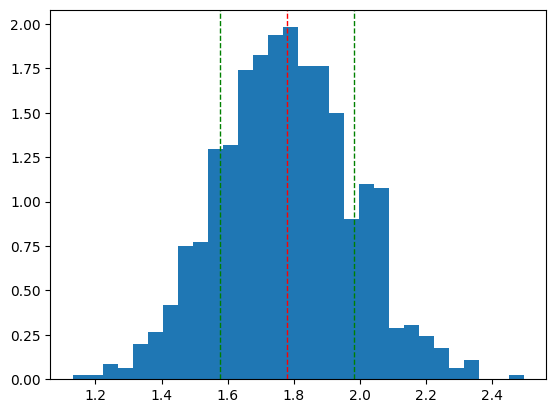

-------------------------------------------------------------------
Numero de pontos:  1000
Media:  1.7743147461479913
Desvio Padrao:  0.06616227304423958
Erro Estatistico:  0.002092234779937594


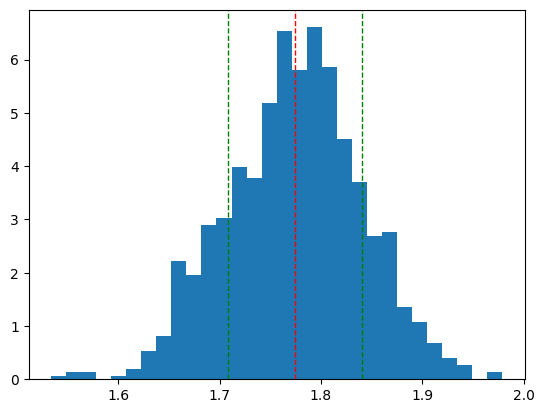

-------------------------------------------------------------------
Numero de pontos:  10000
Media:  1.7735696098512157
Desvio Padrao:  0.02015941237703938
Erro Estatistico:  0.0006374965940203356


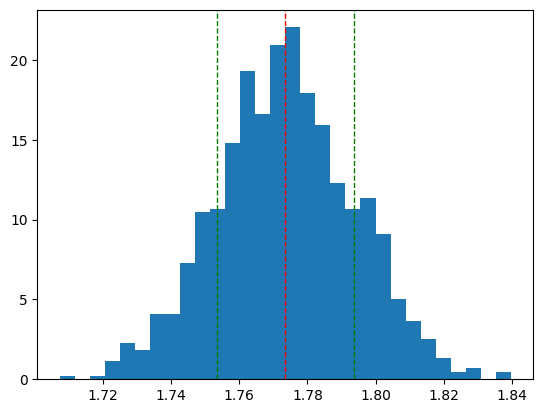

-------------------------------------------------------------------


In [13]:
f = lambda x: math.exp(-x[0]**2)
for pontos in listaDePontos:
    integral = integralPorAmostragemDireta(f, [-3], [3], pontos, amostras)
    imprimirHistograma(integral, pontos, amostras, True)

### Exercício 2:

Numero de pontos:  100
Media:  1.767445446814254
Desvio Padrao:  0.4691141110034189
Erro Estatistico:  0.014834690732958608


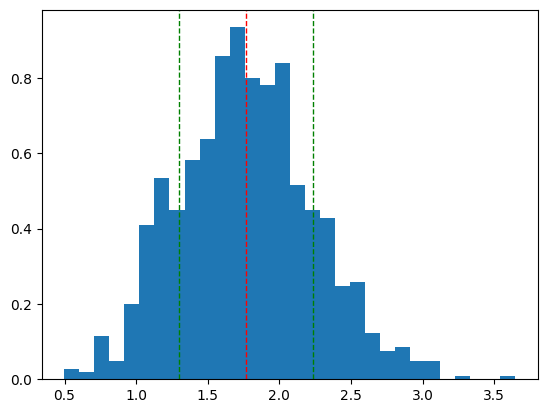

-------------------------------------------------------------------
Numero de pontos:  1000
Media:  1.776769637878851
Desvio Padrao:  0.148325475345603
Erro Estatistico:  0.004690463371192561


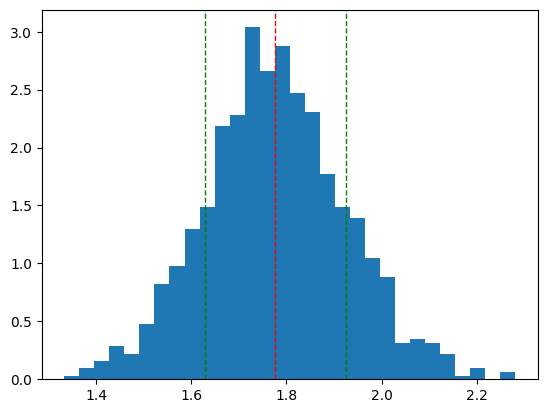

-------------------------------------------------------------------
Numero de pontos:  10000
Media:  1.772565364036357
Desvio Padrao:  0.045235925733750196
Erro Estatistico:  0.0014304855738487415


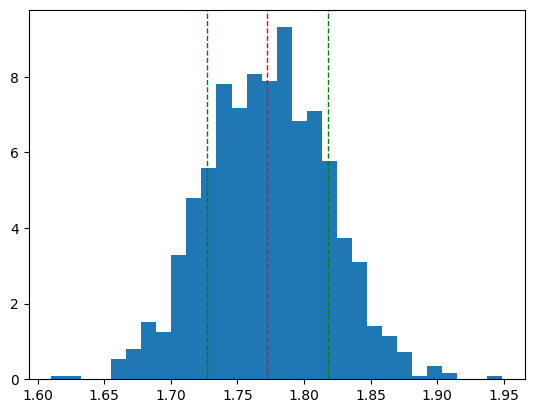

-------------------------------------------------------------------


In [14]:
f = lambda x: math.exp(-x[0]**2)
for pontos in listaDePontos:
    integral = integralPorAmostragemDireta(f, [-10], [10], pontos, amostras)
    imprimirHistograma(integral, pontos, amostras, True)

### Exercício 3:

In [15]:
f = lambda x: x[0] * (x[1]**2) / x[2]
a = [-1, 0, 1]
b = [1, 1, 2]
for pontos in listaDePontos:
    integral = integralPorAmostragemDireta(f, a, b, pontos, amostras)
    imprimirHistograma(integral, pontos, amostras, False)

Numero de pontos:  100
Media:  3.1519588698967315e-05
Desvio Padrao:  0.037570750291836305
Erro Estatistico:  0.0011880914432363856
-------------------------------------------------------------------
Numero de pontos:  1000
Media:  0.0006310095957746589
Desvio Padrao:  0.01140015911709969
Erro Estatistico:  0.00036050468498369226
-------------------------------------------------------------------
Numero de pontos:  10000
Media:  9.798635573246925e-05
Desvio Padrao:  0.0036138451763570245
Erro Estatistico:  0.00011427981868501076
-------------------------------------------------------------------


### Exercício 4:

In [16]:
f = lambda x: 1 / np.dot(np.add(x[:3], x[3:6]), x[6:])
a = [0, 0, 0, 0, 0, 0, 0, 0, 0]
b = [1, 1, 1, 1, 1, 1, 1, 1, 1]

for pontos in listaDePontos:
    integral = integralPorAmostragemDireta(f, a, b, pontos, amostras)
    imprimirHistograma(integral, pontos, amostras, False)

Numero de pontos:  100
Media:  0.8605142336022814
Desvio Padrao:  0.06964884381860892
Erro Estatistico:  0.002202489828641435
-------------------------------------------------------------------
Numero de pontos:  1000
Media:  0.86410177318506
Desvio Padrao:  0.023594329178342095
Erro Estatistico:  0.0007461182006733016
-------------------------------------------------------------------
Numero de pontos:  10000
Media:  0.8628678729357911
Desvio Padrao:  0.006801641648626992
Erro Estatistico:  0.00021508679437923963
-------------------------------------------------------------------
